# Exploratory Data Analysis - Olympics Dataset

## 1- Exploring the Data

#### Loading required libraries and dataset

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
from IPython.display import Image
from IPython.core.display import HTML
warnings.filterwarnings('ignore')
%matplotlib inline


#### Loading the dataset

In [74]:
df_ath = pd.read_csv('data/athlete_events.csv')
df_noc = pd.read_csv('data/noc_regions.csv')

#### Exploring the dataset

In [75]:
print("Rows and Columns: ",df_ath.shape)
df_ath.head()

Rows and Columns:  (271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [76]:
df_ath_cols = list(df_ath.columns)
print("The dataset contains {} columns: ".format(len(df_ath_cols)))
df_ath_cols

The dataset contains 15 columns: 


['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [77]:
print("Rows and Columns: ",df_noc.shape)
df_noc.head()

Rows and Columns:  (230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [78]:
df_noc_cols = list(df_noc.columns)
print("The dataset contains {} columns: ".format(len(df_noc_cols)))
df_noc_cols

The dataset contains 3 columns: 


['NOC', 'region', 'notes']

#### Understanding of the Data

#### Athlete Events sub-dataset

- ID: The id of participant.
- Name: The name of participant.
- Sex: Information about the gender of participant.
- Age: The age of the participant.
- Height: The height of participant.
- Weight: The weight of participant.
- Team: The name of the team of participant.
- NOC: A short code for the country of participant - key for the second dataset.
- Games: The title of the games.
- Year: The year in which games were held.
- Season: Information about the season.
- City: The city in which the games were held.
- Sport: The name of sport in which participant participated.
- Event: Information about the event.
- Medal: Silver, Bronze, Gold or NaN.

#### NOC sub-dataset
- NOC: - NOC: A short code for the country.
- region: The full name of country.
- notes: Some details about the origin of the country.

#### Merging all the sub-datasets

In [79]:
df_final = df_ath.merge(df_noc, how='left', on=['NOC'])
print("Rows and Columns: ", df_final.shape)
df_final.head()

Rows and Columns:  (271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## 2- Cleaning the Data 

#### Filling out NaN(s)

In [80]:
print("Amount of invalid values under each attribute: ")
df_ath.isnull().sum()

Amount of invalid values under each attribute: 


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [81]:
print("Amount of invalid values under each attribute: ")
df_noc.isnull().sum()

Amount of invalid values under each attribute: 


NOC         0
region      3
notes     209
dtype: int64

##### Should we fill out NaN(s)? Not really. This would affect our analysis because the NaN(s) here provide useful information. In the athlete_events dataset, it tells us if the participant has won a medal or not. In the noc_regions the NaN(s) conveys us the information about the origin of the country and it may be useful for our analysis. 

## 3- Analysis

In [82]:
df_ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


#### Total types of sports

In [83]:
df_sp = df_ath['Sport'].drop_duplicates()
print("Total types of Sports: ", len(df_sp))
print("\nSome sports: ", end='')
print(list(df_sp)[:10])

Total types of Sports:  66

Some sports: ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming', 'Badminton']


#### Gender distribution

Male Participants %: 72.51
Female Participants %: 27.49


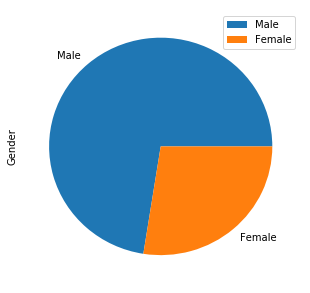

In [84]:
male_p = df_ath['Sex'].value_counts()[0]
female_p = df_ath['Sex'].value_counts()[1]
total_p = male_p + female_p

gender_pchart = pd.DataFrame({'Gender': [male_p, female_p]}, index=['Male', 'Female'])
gender_pchart.plot.pie(y='Gender', figsize=(5, 5))

print("Male Participants %: {0:.2f}".format(male_p/total_p * 100))
print("Female Participants %: {0:.2f}".format(female_p/total_p * 100))


#### Top 10 popular sports (w.r.t participants)

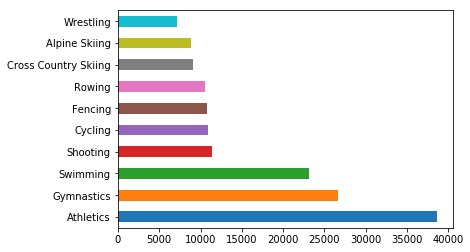

In [85]:
df_ath['Sport'].value_counts().head(10).plot.barh()

#### Top 10 least popular sports (w.r.t participants)

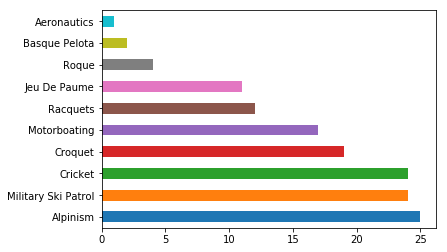

In [86]:
df_ath['Sport'].value_counts().tail(10).plot.barh()

#### Age distribution of Male Athletes

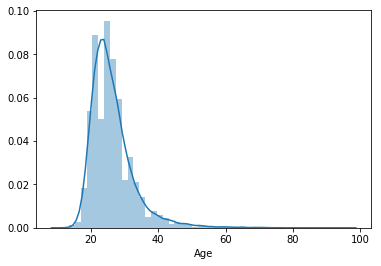

In [87]:
male_age = df_ath[df_ath['Sex'] == 'M']['Age']
sns.distplot(male_age.dropna())

#### Age distribution of Female Athletes

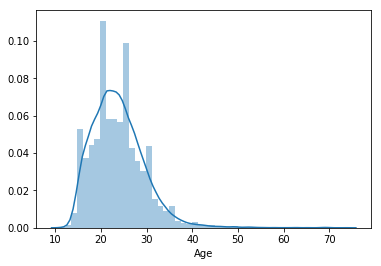

In [88]:
female_age = df_ath[df_ath['Sex'] == 'F']['Age']
sns.distplot(female_age.dropna())

##### It seems like people over the age of 40 won gold medals too. Let's look at the general age distribution and get insights about these people!

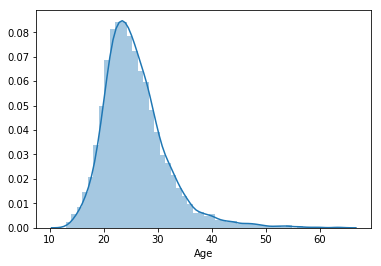

In [89]:
sns.distplot(df_ath[df_ath['Medal'] == 'Gold']['Age'].dropna())

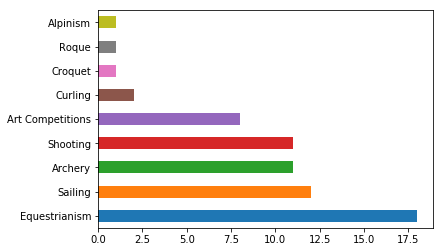

In [90]:
x = df_ath[(df_ath['Medal'] == 'Gold') & (df_ath['Age'] > 50)]['Sport']
x.value_counts().plot.barh()

##### So participants over 40 have won gold medals in the following sports. As expected, not many gold medals have been won by any participant over 40 in a sport which requires peak athelticism!

### Male Participants Analysis

In [91]:
df_men = df_ath[df_ath['Sex'] == 'M']
df_men.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


#### Yearly participants distribution

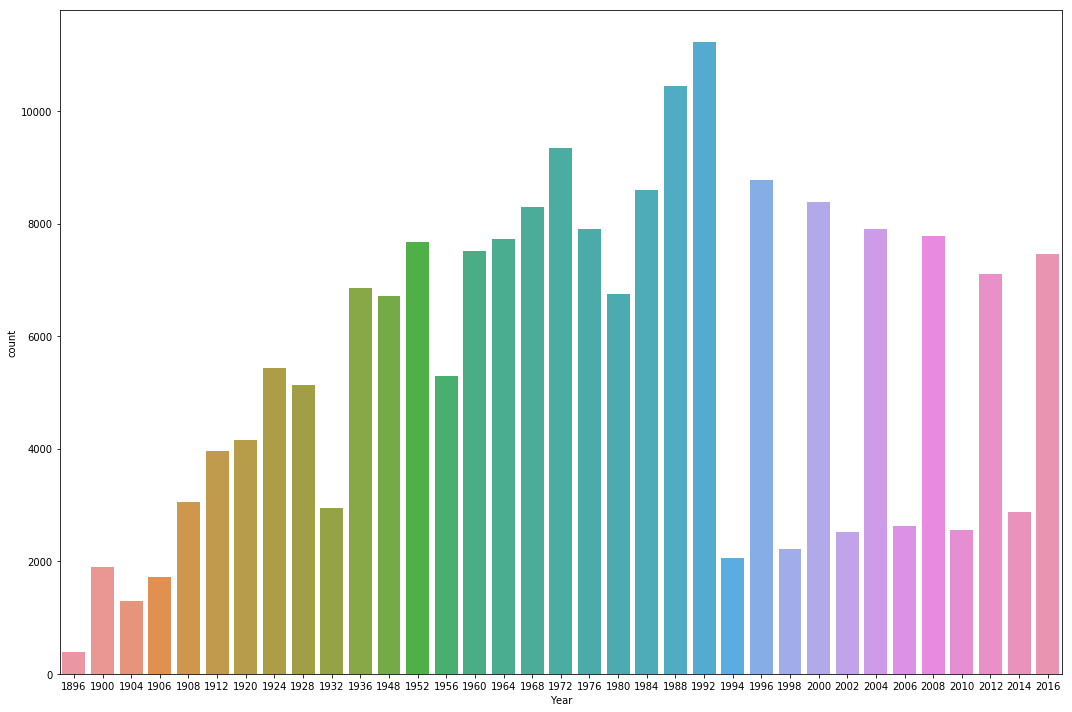

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(df_men['Year'])
plt.tight_layout()

##### It is visible that rougly the no. of participants kept increasing over the years until 1992. From 1992 onwards, a lot less people participated in Winter Olympics than in Summer Olympics. The no. participants in Summers seems to be approx. in 6k-8k range from 1936 to 2016. This is a very useful insight!  

#### Medals won each year

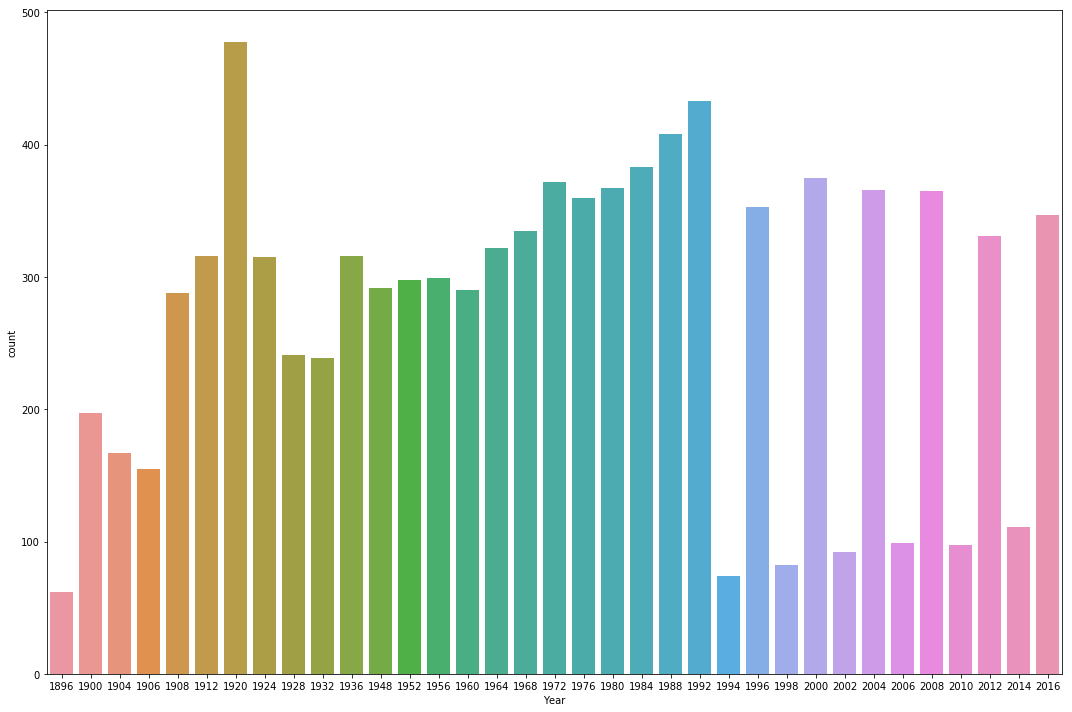

In [93]:
plt.figure(figsize=(15,10))
sns.countplot(df_men[df_men['Medal'] == 'Gold']['Year'])
plt.tight_layout()

##### The batch of 1920 seems to be the most talented one among all the male participants. The total participants were only 4000 approx. and won almost 500 gold medals. The batch of 1992 seems to be the worst batch with the no. of participants over 10k and only 450 approx. medals in the bag.

### Female Participants Analysis

In [94]:
df_wmen = df_ath[df_ath['Sex'] == 'F']
df_wmen.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


#### Yearly participants distribution

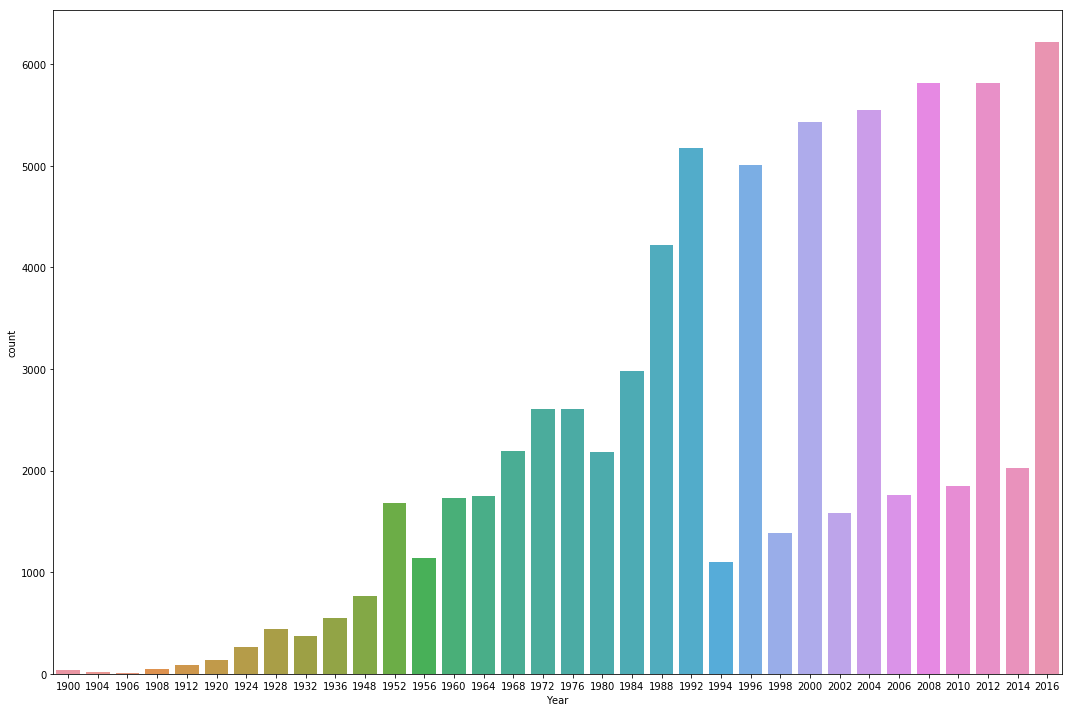

In [95]:
plt.figure(figsize=(15,10))
sns.countplot(df_wmen['Year'])
plt.tight_layout()

##### It is visible that rougly the no. of participants kept increasing over the years until 1992. From 1992 onwards, a lot less people participated in Winter Olympics than in Summer Olympics. The no. participants in Summers seems to be approx. in 4k-6k range from 1988 to 2016. This is a very useful insight!  

#### Medals won each year

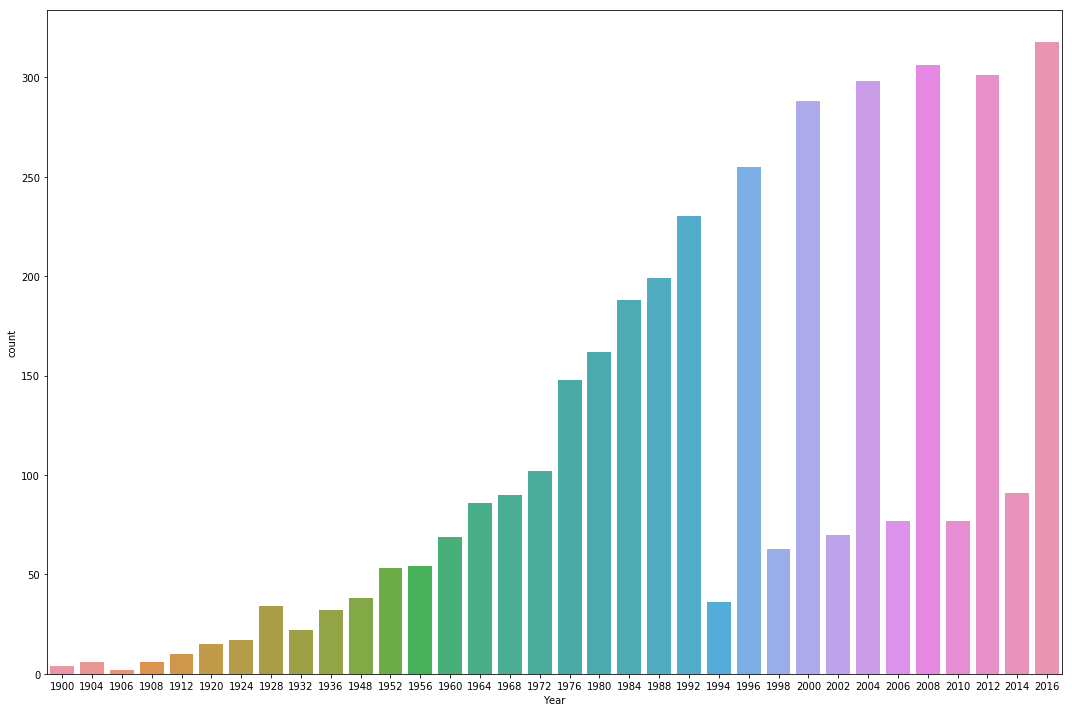

In [96]:
plt.figure(figsize=(15,10))
sns.countplot(df_wmen[df_wmen['Medal'] == 'Gold']['Year'])
plt.tight_layout()

##### The visualization is very similar to the yearly distribution. The more the participants came in, the more the medals were won.

### Country wise Analysis

#### Top 10 countries with most gold medals

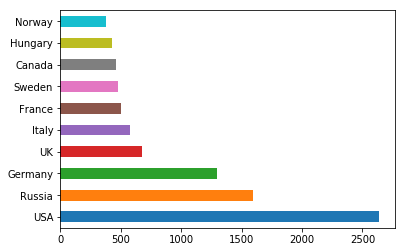

In [97]:
df_final[df_final['Medal'] == 'Gold']['region'].value_counts().head(10).plot.barh()

#### Top 10 countries with min gold medals

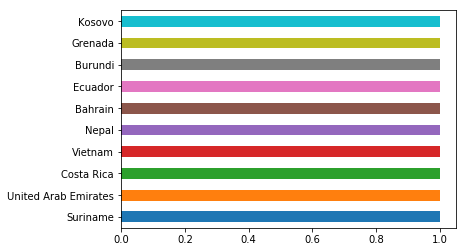

In [98]:
df_final[df_final['Medal'] == 'Gold']['region'].value_counts().tail(10).plot.barh()

#### Sports in which Top 3 countries (w.r.t Gold Medals) are best

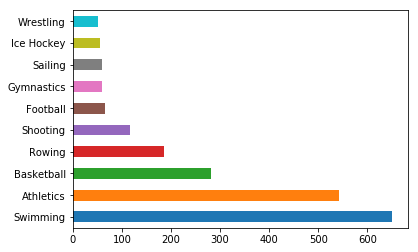

In [99]:
#USA
usa_sports = df_ath[(df_final['region'] == 'USA') & (df_ath['Medal'] == 'Gold')]['Sport'].value_counts()
usa_sports.head(10).plot.barh()

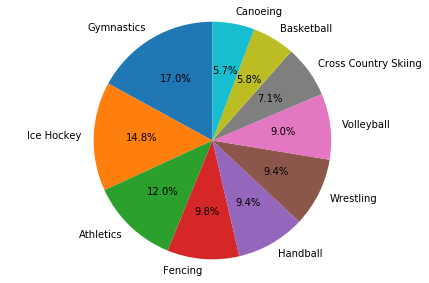

In [100]:
#Russia
rus_sports = df_final[(df_final['region'] == 'Russia') & (df_ath['Medal'] == 'Gold')]['Sport'].value_counts().reset_index()

fig1, ax1 = plt.subplots()
ax1.pie(rus_sports['Sport'].head(10), labels=rus_sports['index'].head(10), autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

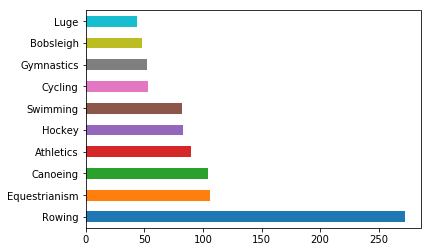

In [101]:
#Germany
ger_sports = df_final[(df_final['region'] == 'Germany') & (df_ath['Medal'] == 'Gold')]['Sport'].value_counts()
ger_sports.head(10).plot.barh()

#### Sports in which Males perform good

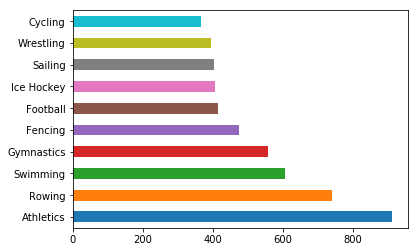

In [102]:
male_sports = df_ath[(df_ath['Sex'] == 'M') & (df_ath['Medal'] == 'Gold')]['Sport'].value_counts()

male_sports.head(10).plot.barh()

#### Sports in which Females perform good

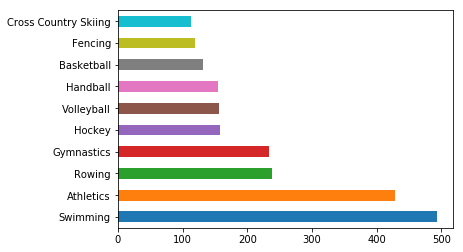

In [103]:
male_sports = df_ath[(df_ath['Sex'] == 'F') & (df_ath['Medal'] == 'Gold')]['Sport'].value_counts()

male_sports.head(10).plot.barh()

#### Fun Analysis: Gold Medals won by Pakistan

Total Medals:-
Gold = 45
Silver = 42
Bronze = 34


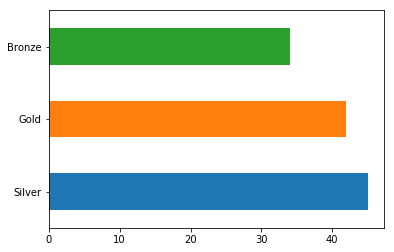

In [104]:
pk_medals = df_final[(df_final['region'] == 'Pakistan') & ~(df_final['Medal'].isnull())]['Medal']
print('Total Medals:-')
print('Gold =', pk_medals.value_counts()[0])
print('Silver =', pk_medals.value_counts()[1])
print('Bronze =', pk_medals.value_counts()[2])
pk_medals.value_counts().plot.barh()
plt.show()

#### Fun Analysis: Sports in which Pakistan performed best

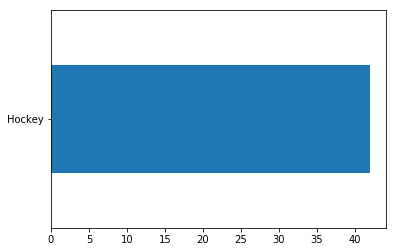

In [105]:
pk_sports = df_final[(df_final['region'] == 'Pakistan') & (df_final['Medal'] == 'Gold')]['Sport'].value_counts()
pk_sports.plot.barh()

### Statistical Analysis

#### Height vs Weight - All Participants

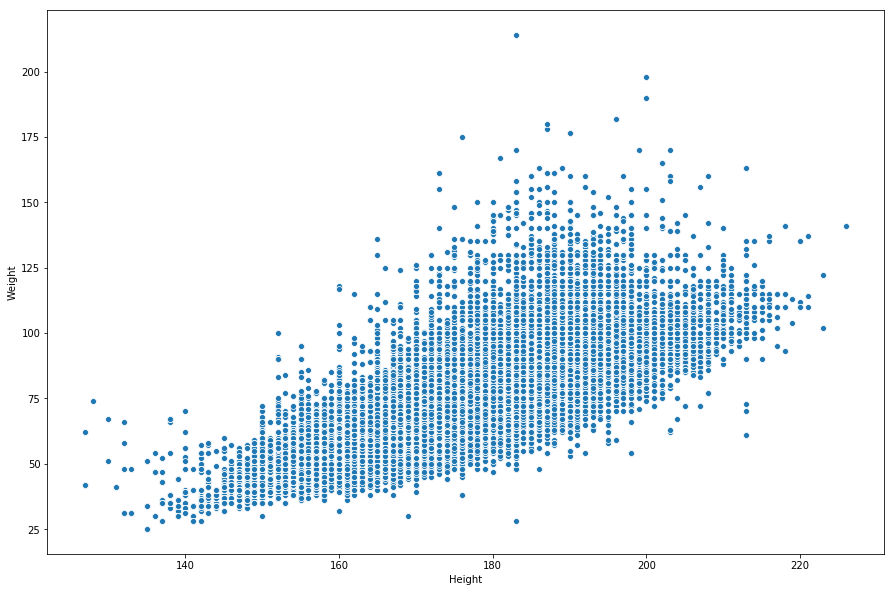

In [106]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_ath['Height'], y=df_ath['Weight'])

#### Height vs Weight - Gold Medalists

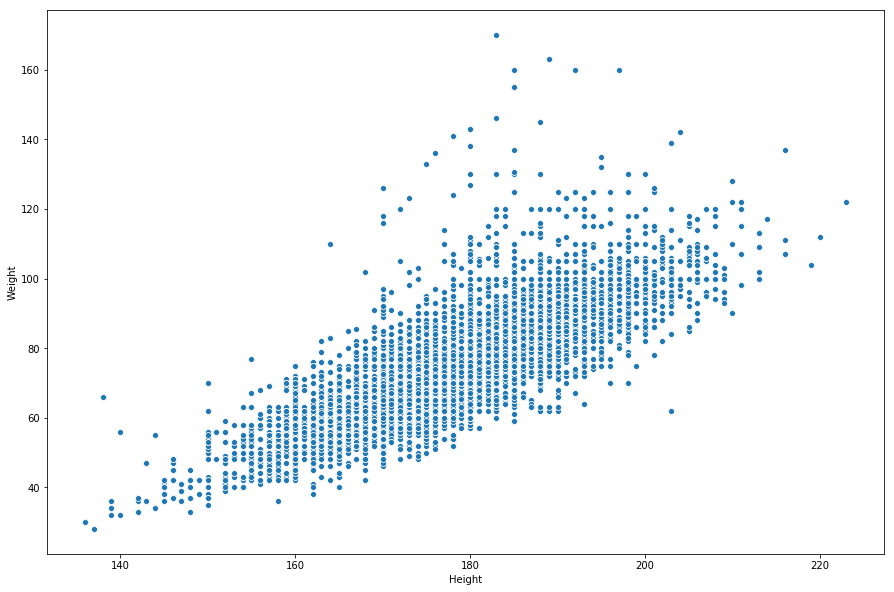

In [107]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_ath[df_ath['Medal'] == 'Gold']['Height'], y=df_ath[df_ath['Medal'] == 'Gold']['Weight'])

##### The relation between both attributes is linear throughout except some outliers. Let's see the participants with weight more than 150 and those who have height more than 210. 

In [108]:
gr_150w = df_ath[(df_ath['Medal'] == 'Gold') & (df_ath['Weight'] > 150)]
gr_150w

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4404,2511,Vasily Ivanovich Alekseyev,M,30.0,185.0,160.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
4405,2511,Vasily Ivanovich Alekseyev,M,34.0,185.0,160.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
199643,100282,Hossein Reza Zadeh,M,22.0,185.0,155.0,Iran,IRI,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
199644,100282,Hossein Reza Zadeh,M,26.0,185.0,155.0,Iran,IRI,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
208622,104740,Behdad Salimi Kordasiabi,M,22.0,192.0,160.0,Iran,IRI,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
235494,118074,Lasha Talakhadze,M,22.0,197.0,160.0,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold


In [109]:
print('Total Participants:',len(gr_150w))
print(gr_150w['Sport'].value_counts())

Total Participants: 9
Weightlifting    9
Name: Sport, dtype: int64


##### All the gold medalists with weight over 150 competed in Weighlifting! Woah!

In [110]:
gr_210h = df_ath[(df_ath['Medal'] == 'Gold') & (df_ath['Height'] > 215)]
gr_210h

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
38381,19736,Tyson Cleotis Chandler,M,29.0,216.0,107.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold
125770,63448,Serhiy Ivanovych Kovalenko,M,25.0,216.0,111.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Gold
166544,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Gold
177224,89103,Shaquille Rashuan O'Neal,M,24.0,216.0,137.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Gold
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
201956,101428,David Maurice Robinson,M,26.0,216.0,107.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
201957,101428,David Maurice Robinson,M,30.0,216.0,107.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Gold
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold


In [111]:
print('Total Participants:',len(gr_210h))
print(gr_210h['Sport'].value_counts())

Total Participants: 8
Basketball    7
Volleyball    1
Name: Sport, dtype: int64


##### 7 out 8 participants competed in Basketball while 1 competed in Volleyball!

#### Age and Year variation

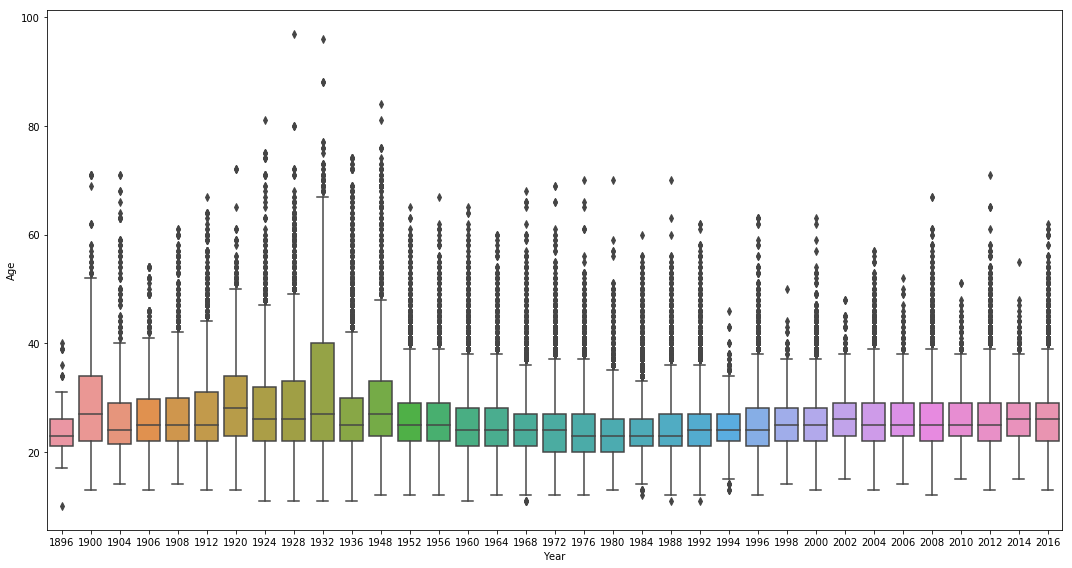

In [112]:
plt.figure(figsize=(15,8))
sns.boxplot(df_ath['Year'], df_ath['Age'])
plt.tight_layout()

##### Some interesting outliers are present here too. Let's look at participants over the age 80. 

In [113]:
df_ath[df_ath['Age'] > 80]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


##### Unfortunately, none of the participants won gold but the keyful insight is that all the people participated in Art competitions.

#### Most decorated olympian

In [114]:
x = df_ath[df_ath['Medal'] == 'Gold'].groupby(by=('Name'), as_index=False)['Medal'].count()
x.nlargest(1, columns='Medal')

,Name,Medal
6633,"Michael Fred Phelps, II",23


THE MVP - THE GOAT - THE OG - MICHAEL FRED PHELPS!


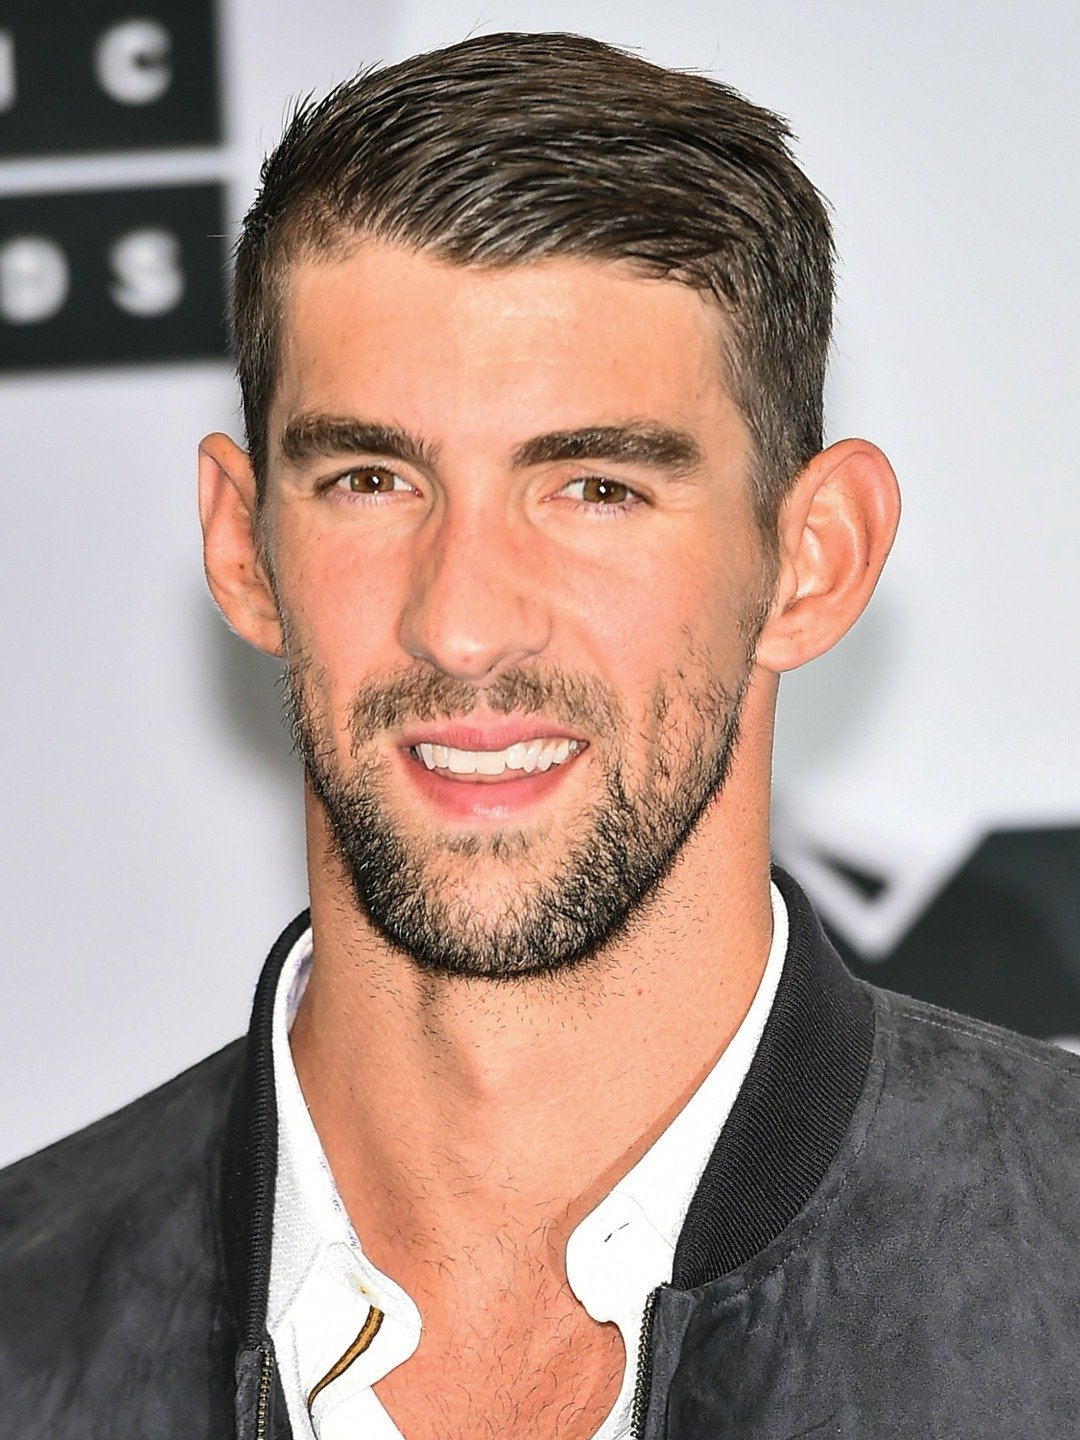

In [115]:
print("THE MVP - THE GOAT - THE OG - MICHAEL FRED PHELPS!")
Image(filename='data/themvp.jpg', width=400, height=300)

## Concluding Insights

- United States of America, Russia and Germany are the most decorated countries in Olympics.
- USA has been the best in Olympics with Basketball and Swimming being its favourite.
- Russia's performed best in Gymnastics while Germany nailed it in Rowing.
- Women did not participate in large number in Olympics in starting years but now they participate equally.
- Michael Phelps is the most decorated olympian of all the time.
- Summer olympics enjoy more participants than the Winter olympics.
- The no. of participants in Winter Olypmics is also growing.
- The first olypmics didnt have any female participants.
